<a href="https://colab.research.google.com/github/ashishshaji/assignment_ineuron/blob/master/ML-assignments/Linear_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression assignment


Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

boston = load_boston()
bos = pd.DataFrame(boston.data)

In [25]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression





boston = load_boston()

In [2]:
print(boston.keys()) # inorder to find keys in boston data

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
bos = pd.DataFrame(boston.data) #y values in boston data
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos.columns = boston.feature_names
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
#lets combine price with  the dataset 
bos['Price']=boston.target
bos.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [6]:
bos.isna().sum() # checking the null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

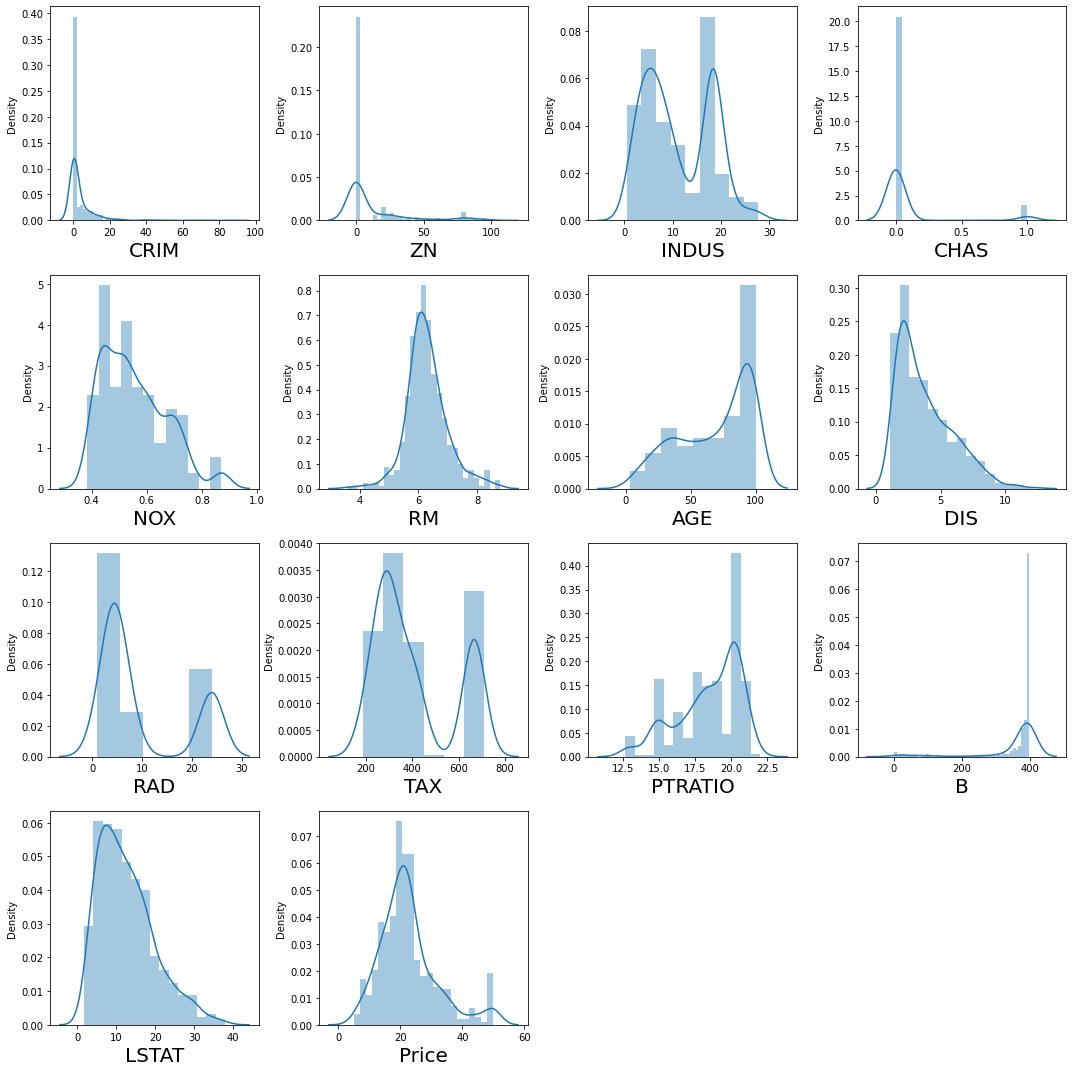

In [7]:
#Let's visualize the data and analyze the relationship between independent and dependent variables:
import seaborn as sns
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [10]:
df=bos

In [12]:
y = df['Price']
X =df.drop(columns = ['Price'])

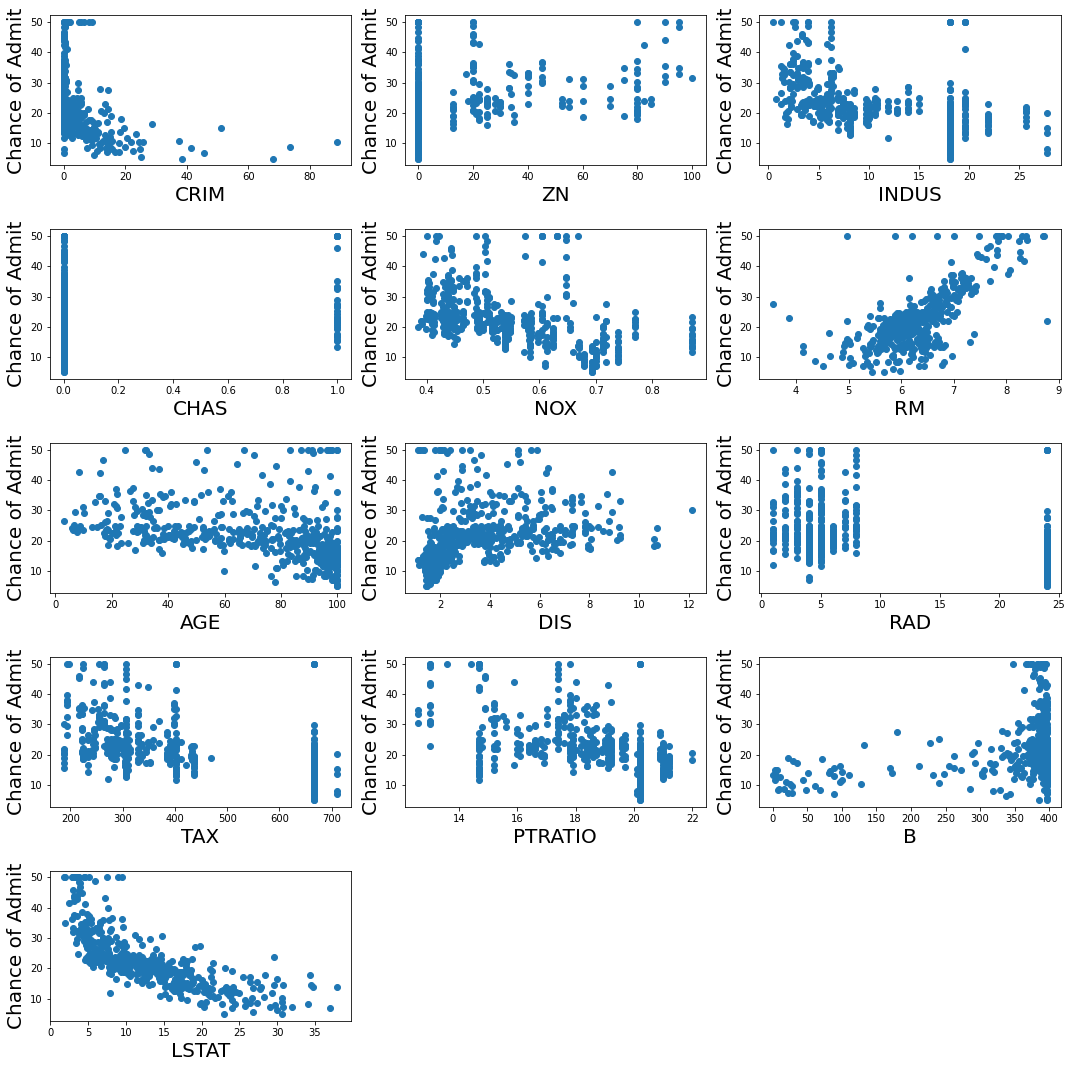

In [13]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

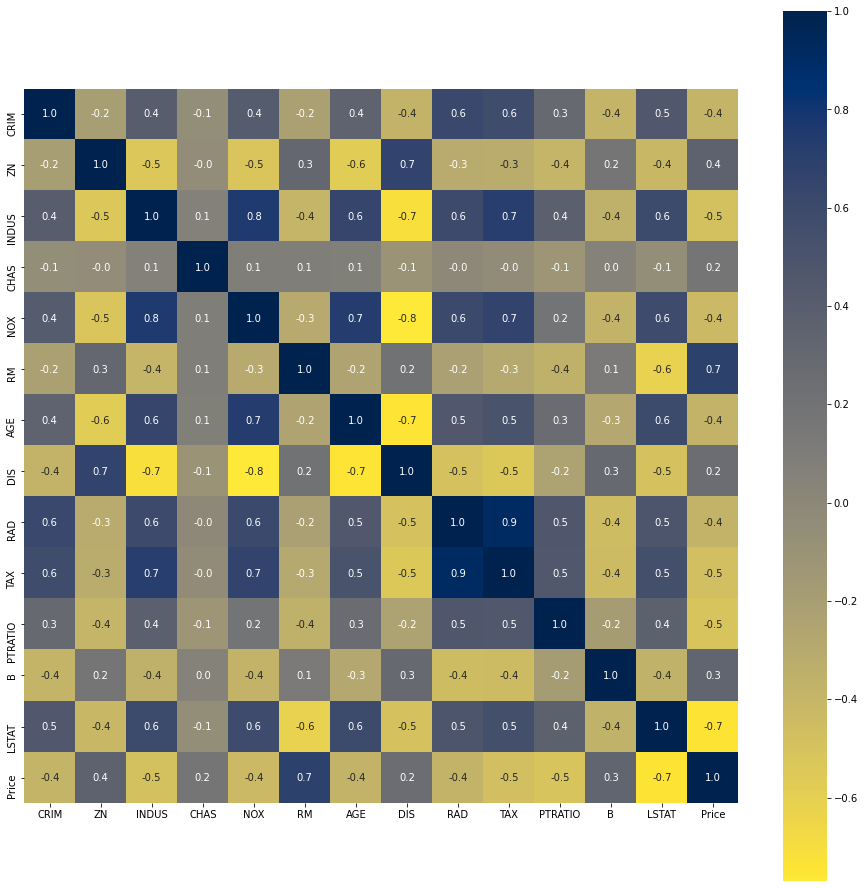

In [16]:
plt.figure(figsize=(16,16))
sns.heatmap(bos.corr(), annot = True, square= True,fmt='.1f',cmap= 'cividis_r')

In [22]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)


array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## Linear Regression

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)


In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [26]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# print intercept and coefficients
print(regression.intercept_)
print(regression.coef_)

22.50722857528611
[-0.88712272  1.175452   -0.11610477  0.9549459  -1.98781429  3.1067488
 -0.39245347 -3.18778152  2.28873011 -1.82529057 -1.84545771  0.82059585
 -2.89878976]


In [30]:
y_pred= regression.predict(x_train)
y_pred

array([31.85198691, 13.52218439, 14.17157751, 27.67874243, 31.73262476,
       11.33839476, 11.01308414, 43.62790305, 23.20897686, 24.82198715,
       27.03806416, 17.64760822, 17.38653476, 40.88851415, 20.34243986,
       21.09961628, 20.57748975, 17.03121358, 18.97407917, 16.12884393,
       17.01095321,  7.16171624, 14.98691903, 13.85668592, 19.41049602,
       24.64845034, 17.03182776, 14.60695584, 34.50685291, 22.18385207,
       23.4375639 , 15.08741231, 18.17011966, 21.18776427, 12.27990198,
       22.77141909, 27.21199032, 25.61733702, 17.65453408, 19.81551605,
       34.91791288,  9.03959289, 28.98881615, 30.85661811, 18.38565334,
       22.52305406, 12.98479699, 22.90122545, 14.27647423, 28.60239032,
       20.38545593, 16.72835198, 24.47762382, 19.5858979 , 34.24521648,
       21.28068596,  7.56144611, 32.35846629, 21.13660204,  8.74488704,
       17.57500457, 41.16947191, 21.26048317, 35.61186091,  2.63036267,
       24.00851247, 21.30739487, 18.41618038, 32.90627628, 27.37

In [43]:
from sklearn import metrics

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.730647531347494
Adjusted R^2: 0.7210541557516514
MAE: 3.328444145891794
MSE: 22.282092126271717
RMSE: 4.720391098867944
